# Calcul approché des probabilités par simulation

## 1 Introduction

(à faire)

In [139]:
import random
def jet2d():
    de1 = random.choice([1,2,3,4,5,6])
    de2 = random.choice([1,2,3,4,5,6])
    return (de1,de2)
realisation = jet2d()
print(realisation)

(4, 6)


In [140]:
def testA(des):
    d1 = des[0]
    d2 = des[1]
    res = (d1 == d2 or d2 == d1 + 1 or d1 == d2+1)
    return res

resTest = testA(realisation)

print(resTest)

False


In [141]:
compteur = 0
for i in range(1000):
    res = testA(jet2d())
    if res == True :
        compteur += 1
print("Estimation de la probabilité : {}".format(compteur/1000))

Estimation de la probabilité : 0.436


## 2 Exercices pratiques

### 2.1 Travaux préliminaires

#### 2.1.1 Simulation répétée de l’expérience

In [142]:
def simulrepExemple(n: int) -> float:
    compteur = 0
    for i in range(n):
        res = testA(jet2d())
        if res == True :
            compteur += 1
    return compteur/n

In [143]:
print(simulrepExemple(10))
print(simulrepExemple(100))
print(simulrepExemple(1000))
print(simulrepExemple(10000))

0.4
0.49
0.443
0.4426


#### 2.1.2 Convergence

In [144]:
def convergence(nmax: int) -> list:
    proba = []
    compteur = 0
    n = 0
    for i in range(nmax):
        n += 1
        res = testA(jet2d())
        if res == True :
            compteur += 1
        proba += [compteur/(n)]
    print(proba)
    return proba

[1.0, 1.0, 1.0, 1.0, 0.8, 0.6666666666666666, 0.7142857142857143, 0.75, 0.6666666666666666, 0.6, 0.5454545454545454, 0.5833333333333334, 0.5384615384615384, 0.5714285714285714, 0.6, 0.625, 0.6470588235294118, 0.6111111111111112, 0.631578947368421, 0.65, 0.6190476190476191, 0.6363636363636364, 0.6521739130434783, 0.6666666666666666, 0.68, 0.6538461538461539, 0.6666666666666666, 0.6785714285714286, 0.6551724137931034, 0.6666666666666666, 0.6774193548387096, 0.65625, 0.6666666666666666, 0.6764705882352942, 0.6571428571428571, 0.6388888888888888, 0.6486486486486487, 0.631578947368421, 0.6410256410256411, 0.625, 0.6097560975609756, 0.6190476190476191, 0.627906976744186, 0.6363636363636364, 0.6444444444444445, 0.6521739130434783, 0.6382978723404256, 0.625, 0.6122448979591837, 0.6, 0.5882352941176471, 0.5961538461538461, 0.6037735849056604, 0.5925925925925926, 0.5818181818181818, 0.5892857142857143, 0.5789473684210527, 0.5862068965517241, 0.576271186440678, 0.5833333333333334, 0.5901639344262

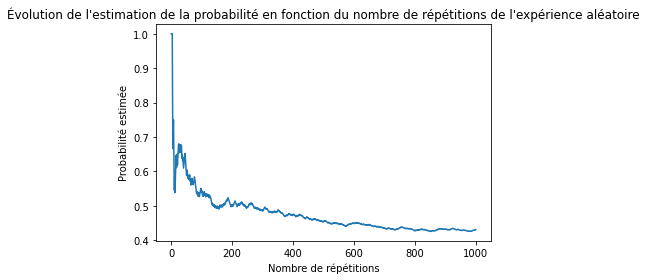

In [145]:
import matplotlib.pyplot as plt
N = 1000
x = list(range(1,N+1))
y = convergence(N)
plt.figure()
plt.plot(x,y)
plt.xlabel("Nombre de répétitions")
plt.ylabel("Probabilité estimée")
plt.title("Évolution de l'estimation de la probabilité en fonction du nombre de répétitions de l'expérience aléatoire")
plt.show()

### 2.2 Chapeaux dérangés

In [146]:
import itertools, random
def chapeauchapeau(n: int, nrep: int) -> float:
    nb_iss_fav = 0
    for i in range(nrep):
        issues = random.sample(range(1, n), n-1)
        k = 0
        for i in range(len(issues)):
            if issues[i] == i:
                k += 1
        if k == 0:
            nb_iss_fav += 1
    return nb_iss_fav / nrep

In [147]:
import random
print(random.sample([1, 2, 3, 4], 4))

[2, 3, 4, 1]


In [148]:
print(chapeauchapeau(6, 10000))

0.4394


### 2.3 Jeu de dés

In [728]:
def desmultiples() -> float:
    nb_iss_fav = 0
    issues = random.sample(range(1, 120), 4)
    print(issues)
    mult21 = 0
    mult9 = 0
        
    for j in range(len(issues)):
        if (issues[j] % 21 == 0):
            mult21 += 1
        if (issues[j] % 9 == 0):
            mult9 += 1
    if (mult21 >= 1) or (mult9 >= 2):
        nb_iss_fav += 1
    return nb_iss_fav / 4

In [729]:
print(desmultiples())

[47, 22, 45, 38]
0.0


In [730]:
def despaires() -> float:
    nb_iss_fav = 0
    issues = random.sample(range(1, 120), 4)
    print(issues)
    issues.sort()
        
    if ((issues[0] == issues[1]) and (issues[2] == issues[3])):
        nb_iss_fav += 1
    return nb_iss_fav / 4

In [731]:
print(despaires())

[84, 104, 64, 77]
0.0


### 2.4 « Paradoxe » des anniversaires

In [20]:
def tirage(n: int) -> list:
    return list(range(1, n+1))

In [21]:
def test(x: list) -> bool:
    x.sort()
    res = False
    for i in range(len(x)-1):
        if x[i] == x[i+1]:
            res = True
    return res

In [259]:
def probA(n: int, nrep: int) -> float:
    count = 0
    for i in range(nrep):
        experience = tirage(n)
        if test(experience) == True:
            count += 1
    return count / nrep

In [260]:
print(probA(n = 10, nrep = 1000))

0.0


In [261]:
print(probA(n = 21, nrep = 1000))

0.0


#### 2.4.1 Estimation de pi

In [368]:
import random
def pointCarre(nrep: int) -> float:
    count = 0
    for i in range(nrep):
        experience = (round(random.random(), 1), round(random.random(), 1))
        if (((experience[0]**2) + (experience[1]**2)) <= 1):
            count += 1
    return count / nrep

In [425]:
print(pointCarre(1000))

0.783
